In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [6]:
#adjust column names with spacing
df.columns = df.columns.str.replace(" ", "_")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
"""We need to categorize the columns into three categories:-
1- Data whose datatype is correct (App, Category, Rating, Type, Content_Rating, Genres)
2- Data whose datatype must be number (Reviews, Size, Installs, Price, Current_Version, Android_Version)
3- Data whose datatype must be a date (Last Updated)"""
correct_cols = ["App", "Category", "Rating", "Type", "Content Rating", "Genres"]
wrong_num_cols = ["Reviews", "Size", "Installs", "Price", "Current_Ver", "Android_Ver"]
wrong_date_cols = ["Last_Updated"]

In [9]:
#Adjust wrong number columns - Reviews
df[wrong_num_cols[0]].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [10]:
df[wrong_num_cols[0]].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [11]:
# df[wrong_num_cols[0]] = df[wrong_num_cols[0]].astype(int)
# df[wrong_num_cols[0]].dtype
# Got error with the "Reviews" value "3.0M"

In [12]:
df[df[wrong_num_cols[0]] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## It looks like the values in the entire row startingfrom the "Category" column are shifted leftwards, so we need to shift them to the right, this will leave the the "Category" column empty 

In [13]:
df.iloc[10472, 1:] = df.iloc[10472, 1:].shift(1)
df.iloc[10472]

/var/folders/y6/pt1tqh4d05j8dx0z6klwzy5h0000gn/T/ipykernel_1209/2488419559.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[10472, 1:] = df.iloc[10472, 1:].shift(1)


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                             None
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content_Rating                                   Everyone
Genres                                                NaN
Last_Updated                            February 11, 2018
Current_Ver                                        1.0.19
Android_Ver                                    4.0 and up
Name: 10472, dtype: object

Now, let's retry to convert the "Reviews" column to numeric

In [14]:
df[wrong_num_cols[0]] = df[wrong_num_cols[0]].astype(int)
df[wrong_num_cols[0]].dtype

dtype('int64')

In [15]:
#Adjust wrong number columns - Size
df[wrong_num_cols[1]].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
def adjust_size_col(size):
    if not(size == "Varies with device"):
        last_char = size[-1].upper()
        value = float(size[:-1])
        if last_char == "M":
            value = value * 1024
        return value

In [17]:
df[wrong_num_cols[1]] = df[wrong_num_cols[1]].apply(adjust_size_col)

In [18]:
df[wrong_num_cols[1]] = df[wrong_num_cols[1]].astype(float)
df[wrong_num_cols[1]].dtype

dtype('float64')

In [19]:
#Adjust wrong number columns - Installs
df[wrong_num_cols[2]].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

For simplicity and to make the data type numeric, we will just remove the "+"

In [20]:
def adjust_installs_col(installs):
    if installs != "0":
        installs = installs.replace(",", "")
        installs = int(installs[:-1])
    else:
        installs = int(installs)
    return installs

In [21]:
df[wrong_num_cols[2]] = df[wrong_num_cols[2]].apply(adjust_installs_col)

In [22]:
df[wrong_num_cols[2]].dtype

dtype('int64')

In [23]:
#Adjust wrong number columns - Price
df[wrong_num_cols[3]].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
def price_adjustment(price):
    if price[0] == "$":
        price = float(price[1:])
    else:
        price = float(price)
    return price

In [25]:
df[wrong_num_cols[3]] = df[wrong_num_cols[3]].apply(price_adjustment)
df[wrong_num_cols[3]].dtype

dtype('float64')

In [26]:
wrong_num_cols

['Reviews', 'Size', 'Installs', 'Price', 'Current_Ver', 'Android_Ver']

In [27]:
#Adjust wrong number columns - Current_Ver
df[wrong_num_cols[4]].value_counts()

Current_Ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

## it seems that the versions cannot be converted to when having too many decimal points, so for simplicity, we will just consider the first decimal point

In [28]:
def adjust_current_version_col(curr_ver):
    if (type(curr_ver)) == float:
         version = curr_ver
    elif (curr_ver == "Varies with device"):
        version = np.nan
    else:
        try:
            version = float(curr_ver[0:3])
        except:
            version = np.nan
    return version

In [29]:
df[wrong_num_cols[4]] = df[wrong_num_cols[4]].apply(adjust_current_version_col)
df[wrong_num_cols[4]].dtype

dtype('float64')

In [30]:
df[wrong_num_cols[4]].value_counts()

Current_Ver
1.0      1797
1.1       760
1.2       532
2.0       410
1.3       336
         ... 
263.0       1
65.0        1
117.0       1
132.0       1
34.0        1
Name: count, Length: 183, dtype: int64

## Some apps has very high number of "Current_Ver" which may be not realistic, and may be for very old apps, so let's see the summary stats of this column

In [31]:
df[wrong_num_cols[4]].describe()

count    9222.000000
mean        6.374680
std        32.335942
min         0.000000
25%         1.100000
50%         2.000000
75%         3.700000
max       858.000000
Name: Current_Ver, dtype: float64

## It seems, that the large numbers are outliers since 75% of the data is les than 3.7, so better to handle that later when handling outliers

In [32]:
wrong_num_cols

['Reviews', 'Size', 'Installs', 'Price', 'Current_Ver', 'Android_Ver']

In [33]:
#Adjust wrong number columns - Android_Ver
df[wrong_num_cols[5]].value_counts()

Android_Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1376
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [34]:
df[wrong_num_cols[5]].nunique()

33

## We can handle that by just considering the minimum version for each app

In [35]:
def get_min_ver(ver):
    if pd.isna(ver) or ver == "Varies with device":
        ver = np.nan
    else:
        try:
            if "and up" in ver:
                ver = float(ver.split(" ")[0])
            elif " - " in ver:
                ver = float(ver.split(" - ")[0])
        except:
            ver = float(ver[0:3])
    return ver
    
    

In [36]:
df[wrong_num_cols[5]] = df[wrong_num_cols[5]].apply(get_min_ver)
df[wrong_num_cols[5]].dtype

dtype('float64')

In [37]:
df[wrong_num_cols[5]].value_counts()

Android_Ver
4.0    2879
4.1    2452
4.4     992
2.3     933
5.0     605
4.2     394
2.2     245
4.3     243
3.0     241
2.1     134
1.6     116
6.0      60
7.0      43
2.0      39
3.2      36
5.1      24
1.5      20
3.1      10
8.0       6
7.1       3
1.0       2
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   object 
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content_Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     9222 non-null   float64
 12  Android_Ver     9477 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.1+ MB


## Now, all columns with erong numeric values are fixed, let's fix the wrong date values 

In [39]:
wrong_date_cols

['Last_Updated']

In [40]:
df[wrong_date_cols[0]]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last_Updated, Length: 10841, dtype: object

In [41]:
df[wrong_date_cols[0]] = pd.to_datetime(df[wrong_date_cols[0]])

In [42]:
df[wrong_date_cols[0]]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 10841, dtype: datetime64[ns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9367 non-null   object        
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content_Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10841 non-null  datetime64[ns]
 11  Current_Ver     9222 non-null   float64       
 12  Android_Ver     9477 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.1+ MB


## Now, all datatypes are fixed

# 2. Check duplicates

In [44]:
df.duplicated().sum()

np.int64(483)

In [45]:
df[df.duplicated(keep = False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37888.0,5000000,Free,0.0,Everyone,Books & Reference,2018-06-25,5.0,4.0
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,NaN,50000000,Free,0.0,Everyone,Business,2018-04-02,NaN,NaN
193,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.1,4.4
204,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,NaN,NaN
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37888.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,NaN,NaN
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,NaN,NaN
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,NaN,NaN
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,88064.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6,5.0


In [46]:
df = df.drop_duplicates()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8893 non-null   object        
 3   Reviews         10358 non-null  int64         
 4   Size            8832 non-null   float64       
 5   Installs        10358 non-null  int64         
 6   Type            10357 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content_Rating  10358 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last_Updated    10358 non-null  datetime64[ns]
 11  Current_Ver     8896 non-null   float64       
 12  Android_Ver     9135 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.1+ MB


# check duplicates for columns that cannot have duplicates, which is only "App" column 

In [48]:
df["App"].duplicated().sum()

np.int64(698)

In [49]:
df[df["App"].duplicated(keep = False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7168.0,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0,4.1
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24576.0,500000,Free,0.0,Everyone,Art & Design;Creativity,2018-08-02,1.0,4.4
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,NaN,NaN
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,2018-08-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,NaN,NaN
10715,FarmersOnly Dating,DATING,3.0,1145,1433.6,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4096.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0
10730,FP Notebook,MEDICAL,4.5,410,61440.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1,4.4


In [50]:
df[df["App"] == "Coloring book moana"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2033,Coloring book moana,FAMILY,3.9,974,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0


In [51]:
df[df["App"] == "Slickdeals: Coupons & Shopping"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2765,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33583,12288.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12288.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4


## It seems that some apps have many common features including the name, but they may differ in other features, so we will keep those has either most recent dates or higher number pf reviews or installs where these are the indicators that the current row is the newest

In [52]:
df[df["App"].duplicated()].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25600.0,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5,4.1
1755,8 Ball Pool,GAME,4.5,14200344,53248.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0,4.0
1703,8 Ball Pool,GAME,4.5,14198602,53248.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0,4.0
1844,8 Ball Pool,GAME,4.5,14200550,53248.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0,4.0
3953,8 Ball Pool,SPORTS,4.5,14184910,53248.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,slither.io,GAME,4.4,5234825,NaN,100000000,Free,0.0,Everyone,Action,2017-11-14,NaN,2.3
565,stranger chat - anonymous chat,DATING,3.5,13204,6246.4,1000000,Free,0.0,Mature 17+,Dating,2018-07-07,2.4,4.1
2637,textPlus: Free Text & Calls,SOCIAL,4.1,382121,28672.0,10000000,Free,0.0,Everyone,Social,2018-07-26,7.3,4.1
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34816.0,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.1,4.4


## Q1: What is the most expensive app on the Play Store?

In [53]:
df["Price"].max()

400.0

## Q2:Which genre has the highest number of apps?

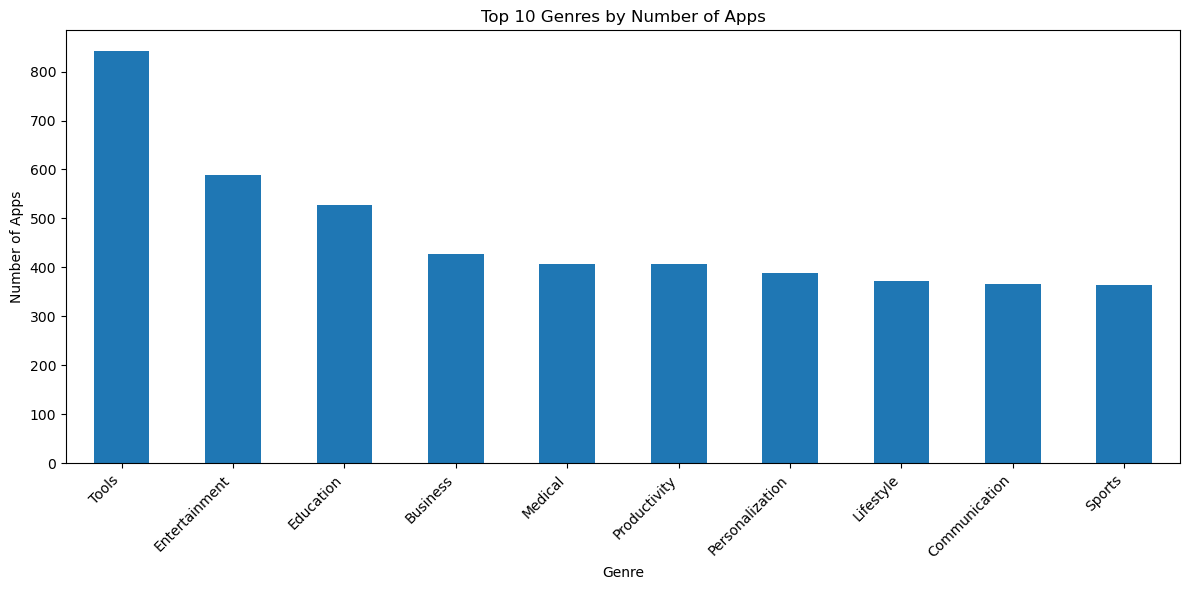

In [54]:
genre_counts = df['Genres'].value_counts()
# Show only top 10 genres to avoid clutter
top_n = 10
top_genres = genre_counts.head(top_n)
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title(f'Top {top_n} Genres by Number of Apps')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q3: What is the average size of free vs. paid apps?

## Q4: What are the top 5 most expensive apps with a perfect rating (5)?

## Q5: How many apps have received more than 50K reviews?

## Q6: What is the average price of apps, grouped by genre and number of installs?

## Q7: How many apps have a rating higher than 4.7, and what is their average price?

## Q8: What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)

## Q9: What are the maximum and minimum sizes of free vs. paid apps?

## Q10: Is there a correlation between an app’s rating, number of reviews, size, and its price?

## Q11: How many apps exist for each type (free/paid) across different content ratings?

## Q12: How many apps are compatible with Android version 4.x?